# CNN : 手寫辨識

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
#整理數據庫 #清理資料
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Step 1 讀入數據集

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [40]:
#x_train
#x_train[0]

## Step 2 資料前處理

In [9]:
h = []
for i in x_train:
    for j in i:
        k = max(j)
        h.append(k)
print(max(h))

255


In [10]:
x_train = x_train.reshape(60000, 28, 28, 1)/ 255 #除255因為最大255

In [11]:
x_test = x_test.reshape(10000, 28, 28, 1)/ 255 #除255因為最大255

In [42]:
x_train[87].shape

(28, 28, 1)

### 處理輸出
#### ● 使用one-hot encoding

In [13]:
y_train= to_categorical(y_train, 10)
y_test= to_categorical(y_test, 10)

## Step 3 打造神經網路

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [15]:
model = Sequential()

#### ● input_shape=(28, 28, 1) : 28 * 28的1層channels
#### ● padding='same' 較容易掌握輸出大小, 因此較常使用

In [16]:
#16 filters #shape:3*3 #input:28*28, ouput:28*28
model.add(Conv2D(16, (3,3), padding='same', input_shape=(28, 28, 1), activation='relu'))

#### ● 輸出16個28*28矩陣 => 因為16個filters
#### ● 事實上是(28, 28, 16) => 似堆疊了16層

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))
# become(14, 14, 16)

#### ● 因為有16張大小為28 * 28的記分板， 每張都切成大小為2 * 2，所以變為16張大小為14 * 14的記分板
#### ● (28, 28, 16) 變為 (14, 14, 16)

In [18]:
model.add(Conv2D(32, (3,3), padding='same',  activation='relu'))
# become(14, 14, 32)

In [19]:
model.add(MaxPooling2D(pool_size=(2, 2)))
# become(7, 7, 32)

In [20]:
model.add(Conv2D(64, (3,3), padding='same',  activation='relu'))
# become(7, 7, 64)

In [21]:
model.add(MaxPooling2D(pool_size=(2, 2)))
# become(7/2, 7/2, 64) wrong!!!! => become(3, 3, 64)

### 拉平

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(54, activation= 'relu'))

In [24]:
model.add(Dense(10, activation= 'softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [27]:
### 因為3*3個filter所以有 3*3 個weights 
### [3*3(weights) + 1 (bias)] * 16 = 160

#如下圖所示!!!
#16(channels)是由於前一層有16個filter因此會輸出疊起來的16個記分板(16 channels) 
### [[3*3](weights) * 16(channels) + 1(activation fn)] * 32(number of filters) = 4640

### 解釋參數數量 
![說明](sss.jpg)

### 2個2-D filters 
![說明](2019022510030884.png)

### ?????? 為何最後拉平為576

In [28]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

## Step 4 Training

In [29]:
model.fit(x_train, y_train, batch_size=128, epochs= 12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 281us/sample - loss: 0.0893 - accuracy: 0.2919
Epoch 2/12
60000/60000 [==============================] - 16s 267us/sample - loss: 0.0860 - accuracy: 0.3981
Epoch 3/12
60000/60000 [==============================] - 21s 343us/sample - loss: 0.0557 - accuracy: 0.6364
Epoch 4/12
60000/60000 [==============================] - 16s 262us/sample - loss: 0.0233 - accuracy: 0.8532
Epoch 5/12
60000/60000 [==============================] - 20s 331us/sample - loss: 0.0157 - accuracy: 0.8990
Epoch 6/12
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0122 - accuracy: 0.9219
Epoch 7/12
60000/60000 [==============================] - 21s 344us/sample - loss: 0.0102 - accuracy: 0.9353
Epoch 8/12
60000/60000 [==============================] - 17s 283us/sample - loss: 0.0089 - accuracy: 0.9428
Epoch 9/12
60000/60000 [==============================] - 19s 314us/sample - loss: 0.0079 - accuracy: 0.9

## Step 5 Testing

In [30]:
result = model.predict_classes(x_test)

In [31]:
def my_predict(n):
    print('神經網路預測為：', result[n])
    X = x_test[n].reshape(28,28)
    plt.imshow(X)

神經網路預測為： 9


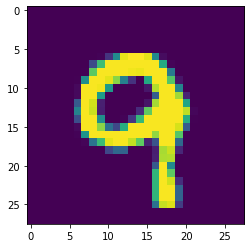

In [32]:
my_predict(99)

### Interact

In [33]:
from ipywidgets import interact_manual

In [45]:
interact_manual(my_predict, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

## Step 6 看testing的好不好

In [35]:
score = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [36]:
loss, acc = score

In [37]:
#print(loss)

In [38]:
print('測試資料正確率：', acc)

測試資料正確率： 0.9662


## Step 7 存取我們的model
#### ● 下次開就不用重新訓練

In [39]:
model.save('myCNNmodel.h5')